In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv("./data/parking_citations.corrupted.csv")

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1) 
       
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

,Missing Values,% of Total Values
VIN,8709705,99.8
Marked Time,8435415,96.7
Meter Id,6456512,74.0
Make,4368470,50.1
Plate Expiry Date,794827,9.1
Route,65354,0.7
Body Style,8890,0.1
Fine amount,6507,0.1
Color,4115,0.0
Issue time,2583,0.0


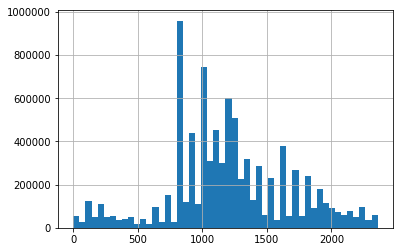

In [7]:
%matplotlib inline
data["Issue time"].hist(bins=50)

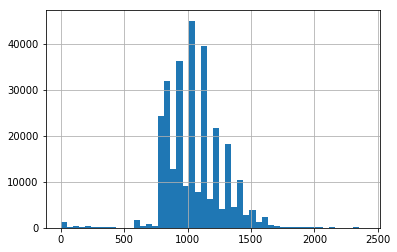

In [8]:
data["Marked Time"].hist(bins=50)

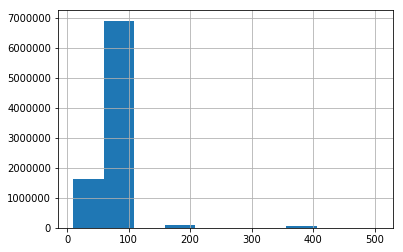

In [9]:
data["Fine amount"].hist(bins=10)

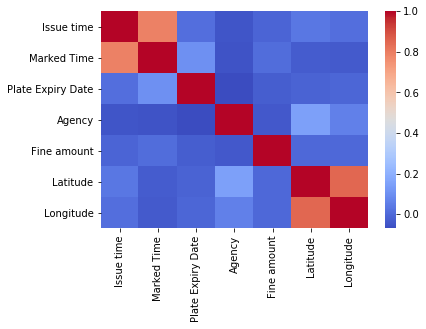

In [10]:
sns.heatmap(data.corr(), cmap="coolwarm")

In [11]:
data[data["VIN"].isna()==False]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
1235876,4241125932,2014-10-31T00:00:00,805.0,NaN,NaN,CA,NaN,1ZVFT80N465228314,NaN,PA,BK,7045 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402218.1,1894969.7
1235877,4241125943,2014-10-31T00:00:00,807.0,NaN,NaN,CA,201509.0,0199,NaN,PA,SL,6941 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402214.7,1894293.0
1235878,4241125954,2014-10-31T00:00:00,809.0,NaN,NaN,CA,201502.0,3491,NaN,PA,BK,6621 LINDLEY AVE,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6402205.6,1892169.7
1235879,4241125965,2014-10-31T00:00:00,814.0,NaN,NaN,CA,NaN,1G1ZS58F47F170546,NaN,PA,SL,6430 RESEDA BLVD,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6399558.0,1890949.9
1235880,4241125976,2014-10-31T00:00:00,815.0,NaN,NaN,CA,201412.0,9817,TOYT,PA,GN,6430 RESEDA BLVD,00374,53.0,80.69BS,NO PARK/STREET CLEAN,73.0,6399558.0,1890949.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252333,4247320195,2014-11-03T00:00:00,1110.0,CB3067A,NaN,CA,NaN,1N4AL3AP2EN224587,NaN,PA,GY,355 4TH ST E,00667,56.0,88.13B+,METER EXP.,63.0,6485950.2,1840638.1
1252334,4247320206,2014-11-03T00:00:00,1131.0,NaN,NaN,CA,11.0,NV,NaN,VN,BN,300 LOS ANGELES ST S,00667,56.0,80.56E4+,RED ZONE,93.0,6487537.5,1840128.2
1252335,4247320221,2014-11-03T00:00:00,1153.0,LT288,NaN,CA,201509.0,7870,NaN,PA,GY,471 3RD ST E,00667,56.0,88.13B+,METER EXP.,63.0,6504955.2,1738919.6
1252336,4247320232,2014-11-03T00:00:00,1209.0,LT372A,NaN,CA,201503.0,9425,NaN,PA,SL,323 BOYD ST,00667,56.0,88.13B+,METER EXP.,63.0,6487783.2,1839600.4


In [12]:
data[data["VIN"]=="NV"]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
1235930,4242410454,2014-11-01T00:00:00,911.0,NaN,NaN,CA,5.0,NV,NaN,PA,BK,14800 CAMARILLO ST,360R1,53.0,80.69B,NO PARKING,73.0,6423940.3,1880017.6
1235931,4242410465,2014-11-01T00:00:00,912.0,NaN,NaN,IL,7.0,NV,NaN,PU,WT,14800 CAMARILLO ST,360R1,53.0,80.69B,NO PARKING,73.0,6423940.3,1880017.6
1235938,4242410535,2014-11-01T00:00:00,941.0,SO623,NaN,CA,5.0,NV,BMW,PA,SL,4900 VAN NUYS BL,360R1,53.0,88.13B+,METER EXP.,63.0,6425928.2,1880706.9
1235944,4242410605,2014-11-01T00:00:00,1407.0,NaN,NaN,CA,2.0,NV,TOYT,PA,SL,15632 SATICOY ST,360R1,53.0,22502A,18 IN. CURB/2 WAY,63.0,6418419.8,1898578.1
1236067,4243668402,2014-11-01T00:00:00,1323.0,NaN,NaN,CA,201506.0,NV,MERC,PA,BL,7100 BROADWAY,549A,51.0,80.56E4+,RED ZONE,93.0,6477289.0,1813621.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252320,4247320066,2014-11-03T00:00:00,905.0,NaN,NaN,CA,8.0,NV,NaN,TK,RD,640 WALL ST S,00667,56.0,22500H,DOUBLE PARKING,68.0,6486628.3,1838064.4
1252324,4247320103,2014-11-03T00:00:00,922.0,NaN,NaN,CA,201501.0,NV,TOYT,PA,GY,545 SAN PEDRO ST S,00667,56.0,80.69A+,STOP/STAND PROHIBIT,93.0,6487601.0,1838238.0
1252331,4247320173,2014-11-03T00:00:00,1038.0,NaN,NaN,CA,9.0,NV,NaN,VN,WT,471 3RD ST E,00667,56.0,80.56E4+,RED ZONE,93.0,6504955.2,1738919.6
1252334,4247320206,2014-11-03T00:00:00,1131.0,NaN,NaN,CA,11.0,NV,NaN,VN,BN,300 LOS ANGELES ST S,00667,56.0,80.56E4+,RED ZONE,93.0,6487537.5,1840128.2


In [13]:
data["VIN"].fillna("NV", inplace=True)

In [14]:
data["Issue time"].fillna(0, inplace=True)

In [15]:
data["Marked Time"] = data.groupby("Issue time")["Marked Time"].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [16]:
data["Marked Time"].fillna(0, inplace=True)

In [17]:
data["Meter Id"].value_counts()

37       46582
53       30478
51       29736
13       27188
49       26537
         ...  
3691         1
RA160        1
WW163        1
432          1
WA69M        1
Name: Meter Id, Length: 37823, dtype: int64

In [18]:
data["Meter Id"].fillna("NA", inplace=True)

In [19]:
data["Plate Expiry Date"].fillna(0, inplace=True)

In [20]:
data["Route"].value_counts()

00600    515410
00500    363630
00402    174775
00401    170018
00403    131820
          ...  
13H13         1
06752         1
02554         1
6FBZ8         1
RD199         1
Name: Route, Length: 8479, dtype: int64

In [21]:
data["Route"].fillna("00600", inplace=True)

In [22]:
data[data["Body Style"].isna()==False]

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NA,1040.0,CA,200304.0,NV,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
1,1103700150,2015-12-21T00:00:00,1435.0,NA,1215.5,CA,201512.0,NV,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04
2,1104803000,2015-12-21T00:00:00,2055.0,NA,1708.0,CA,201503.0,NV,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6.439998e+06,1.802686e+06
3,1104820732,2015-12-26T00:00:00,1515.0,NA,1257.0,CA,0.0,NV,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6.440041e+06,1.802686e+06
4,1105461453,2015-09-15T00:00:00,115.0,NA,2315.0,CA,200316.0,NV,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,9.999900e+04,9.999900e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726009,4347602394,2019-01-10T00:00:00,1245.0,VN686B,1034.0,CA,201905.0,NV,NaN,PA,WT,14301 DELANO ST,00300,53.0,88.13B+,METER EXP.,63.0,6.427279e+06,1.889149e+06
8726010,4347602405,2019-01-10T00:00:00,1350.0,VN316,1130.0,CA,201905.0,NV,HYUN,PA,SL,14500 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.425963e+06,1.890254e+06
8726011,4347602416,2019-01-10T00:00:00,1354.0,VN914,1136.0,CA,201912.0,NV,NISS,PA,GY,14400 FRIAR ST,00300,53.0,88.13B+,METER EXP.,63.0,6.426623e+06,1.890252e+06
8726012,4347602420,2019-01-10T00:00:00,1411.0,VN725,1151.0,CA,201903.0,NV,NaN,PA,GY,6300 SYLMAR AV,00300,53.0,88.13B+,METER EXP.,63.0,6.426622e+06,1.889882e+06


In [23]:
data["Body Style"].value_counts()

PA    7673976
PU     298897
VN     233505
TK     213271
CM     140263
       ...   
BI          1
JU          1
PC          1
V8          1
CG          1
Name: Body Style, Length: 191, dtype: int64

In [24]:
data['Body Style'].fillna("PA", inplace=True)

In [25]:
data["Violation Description"].fillna("NO DESCRIPTION", inplace=True)

In [26]:
data["Fine amount"].isna().sum()

6507

In [27]:
data["Fine amount"] = data.groupby("Violation Description")["Fine amount"].transform(lambda x: x.fillna(x.median()))

In [28]:
data["Fine amount"].fillna(data["Fine amount"].mean(), inplace=True)

In [29]:
data["Color"].fillna("NA", inplace=True)

In [30]:
data["Location"].fillna("NO LOCATION", inplace=True)

In [31]:
data["RP State Plate"].value_counts()

CA    8127986
AZ      77649
TX      55337
NV      51944
FL      37924
       ...   
AS         16
NF         13
YU          8
|           2
ML          1
Name: RP State Plate, Length: 78, dtype: int64

In [32]:
data["RP State Plate"].fillna("CA", inplace=True)

In [33]:
data["Agency"].value_counts()

54.0    2150548
51.0    1943578
56.0    1846731
53.0    1571032
55.0     876274
1.0      189383
2.0       51700
57.0      37202
4.0       26652
58.0       9596
36.0       8028
40.0       5644
3.0        4965
11.0       3285
34.0        381
41.0        171
97.0         87
5.0          61
50.0         30
59.0         30
6.0          19
12.0         13
60.0         11
77.0          7
52.0          6
9.0           5
7.0           4
15.0          4
24.0          3
35.0          3
45.0          2
8.0           2
16.0          1
30.0          1
13.0          1
42.0          1
32.0          1
10.0          1
43.0          1
71.0          1
70.0          1
68.0          1
61.0          1
38.0          1
Name: Agency, dtype: int64

In [34]:
data["Agency"] = data.groupby("Route")["Agency"].transform(lambda x: x.fillna(x.median()))

In [35]:
data["Issue Date"].value_counts()

2016-01-19T00:00:00    9830
2014-12-31T00:00:00    9605
2016-05-05T00:00:00    9366
2016-02-23T00:00:00    9339
2015-06-09T00:00:00    9275
                       ... 
2014-08-01T00:00:00       1
2014-05-24T00:00:00       1
2013-06-14T00:00:00       1
2013-02-01T00:00:00       1
2013-01-12T00:00:00       1
Name: Issue Date, Length: 1843, dtype: int64

In [36]:
data["Issue Date"].fillna("2016-01-19T00:00:00", inplace=True)

In [37]:
latitude = data["Latitude"]
longitude = data["Longitude"]
data["Latitude"].fillna("99999.0", inplace=True)
data["Longitude"].fillna("99999.0", inplace=True)

In [38]:
data.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
Meter Id                  object
Marked Time              float64
RP State Plate            object
Plate Expiry Date        float64
VIN                       object
Make                      object
Body Style                object
Color                     object
Location                  object
Route                     object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                  object
Longitude                 object
dtype: object

In [39]:
le = LabelEncoder()
data["Meter Id"] = le.fit_transform(data["Meter Id"])
data["RP State Plate"] = le.fit_transform(data["RP State Plate"])
data["VIN"] = le.fit_transform(data["VIN"])
data["Body Style"] = le.fit_transform(data["Body Style"])
data["Color"] = le.fit_transform(data["Color"])
data["Route"] = le.fit_transform(data["Route"])
data["Violation code"] = le.fit_transform(data["Violation code"])
data["Violation Description"] = le.fit_transform(data["Violation Description"])
data["Location"] = le.fit_transform(data["Location"])

In [40]:
data["Ticket number"] = data["Ticket number"].apply(lambda x: str(x))

In [41]:
data["Ticket number"] = le.fit_transform(data["Ticket number"])

In [42]:
data["Issue Date"] = le.fit_transform(data["Issue Date"])

In [43]:
data.dtypes

Ticket number              int64
Issue Date                 int64
Issue time               float64
Meter Id                   int64
Marked Time              float64
RP State Plate             int64
Plate Expiry Date        float64
VIN                        int64
Make                      object
Body Style                 int64
Color                      int64
Location                   int64
Route                      int64
Agency                   float64
Violation code             int64
Violation Description      int64
Fine amount              float64
Latitude                  object
Longitude                 object
dtype: object

In [44]:
data["Latitude"] = data["Latitude"].apply(lambda x: float(x))
data["Longitude"] = data["Longitude"].apply(lambda x: float(x))

Text(0.5, 1.0, 'Elbow curve')

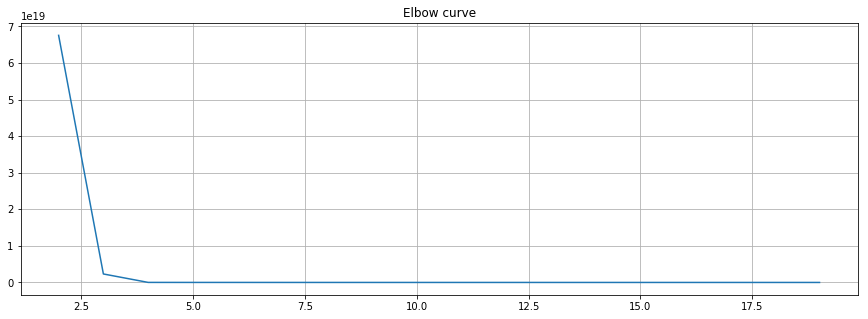

In [45]:
from matplotlib import pyplot as plt

distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["Latitude", "Longitude"]])
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')


In [46]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data[["Latitude", "Longitude"]])
data["clusters"] = clusters

In [47]:
data.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,clusters
0,7914,726,1251.0,16241,1040.0,7,200304.0,7491,NaN,107,35,249896,1105,1.0,110,661,50.0,99999.0,99999.0,1
1,9213,726,1435.0,16241,1215.5,7,201512.0,7491,NaN,170,101,1011165,3430,1.0,110,661,50.0,99999.0,99999.0,1
2,12047,726,2055.0,16241,1708.0,7,201503.0,7491,NaN,107,11,534826,4763,2.0,286,788,58.0,6439997.9,1802686.4,0
3,12142,731,1515.0,16241,1257.0,7,0.0,7491,NaN,107,101,4195,4623,2.0,0,17,93.0,6440041.1,1802686.2,0
4,17669,629,115.0,16241,2315.0,7,200316.0,7491,CHEV,107,11,1470154,3534,1.0,216,674,93.0,99999.0,99999.0,1


In [48]:
data["Make"].value_counts().nlargest(25)

TOYT    721411
HOND    491961
FORD    382695
NISS    311324
CHEV    297076
BMW     199221
MERZ    177307
VOLK    149501
HYUN    133864
DODG    127764
LEXS    124508
KIA     101746
JEEP    100909
AUDI     84229
MAZD     79853
OTHR     72411
GMC      62391
CHRY     57317
INFI     56809
ACUR     52703
SUBA     46898
VOLV     42330
TOYO     40064
MITS     37842
CADI     34080
Name: Make, dtype: int64

In [49]:
top_25 = ["TOYT", "HOND", "FORD", "NISS", "CHEV", "BMW", "MERZ", "VOLK", "HYUN", "DODG", "LEXS", "KIA", "JEEP", "AUDI", "MAZD", "OTHR", "GMC", "CHRY", "INFI", "ACUR", "SUBA", "VOLV", "TOYO", "MITS", "CADI"]

In [50]:
y = []
for x in data["Make"]:
    if x in top_25:
        y.append(1)
    else:
        y.append(0)
    

In [51]:
print(len(y))
print(len(data["Make"]))

8726014
8726014


In [52]:
data = data.drop(["Make"], axis=1)

In [53]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.2)

In [55]:
param_grid = {
    'boosting': ['gbdt', 'dart'], # traditional gradient boosting decision tree
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'num_leaves': [6, 14, 31, 64],
    'reg_alpha': [0, 1e-1, 2, 7], # L1 regularization
    'reg_lambda': [0, 1e-1, 2, 7], # L2 regularization
    'subsample': [0.8, 1], # subsample ratio of the training instance
    'colsample_bytree': [0.8, 1], # subsample ratio of columns when constructing the tree
    'min_split_gain': [0.0, 0.1, 0.01], # minimum loss reduction required to make further partition on a leaf node of the tree
    'min_child_weight': [1e-3, 1e-2], # minimum sum of instance weight (hessian) needed in a leaf
    'min_child_samples': [20, 50],# minimum number of data needed in a leaf
    'importance_type': ['split', 'gain']
}

mdl = lgb.LGBMClassifier(
          n_estimators = 1000,
          n_jobs = -1, 
          silent = True,
          max_depth = -1,
          subsample_freq=1,
          categorical_feature=[0,1,3,5,6,7,8,9,10,11,12,13,14,15,16]
        )


In [56]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mdl, param_grid, verbose=1, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49152 candidates, totalling 245760 fits


/home/jupyter/.local/lib/python3.5/site-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/home/jupyter/.local/lib/python3.5/site-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/home/jupyter/.local/lib/python3.5/site-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  .format(key))
/home/jupyter/.local/lib/python3.5/site-packages/lightgbm/basic.py:741: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argu